In [3]:
import scipy.io
import numpy as np

# Load the .mat file
data = scipy.io.loadmat('emnist-letters.mat')

train_images = data['dataset']['train'][0][0]['images'][0][0]
train_labels = data['dataset']['train'][0][0]['labels'][0][0]
test_images = data['dataset']['test'][0][0]['images'][0][0]
test_labels = data['dataset']['test'][0][0]['labels'][0][0]
train_images = train_images.reshape((-1, 28, 28), order='F') / 255.0
test_images = test_images.reshape((-1, 28, 28), order='F') / 255.0

In [4]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
train_labels = train_labels.flatten() - 1
test_labels = test_labels.flatten() - 1

In [5]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(26, activation='softmax')  # 26 letters A-Z
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2025-05-17 15:05:14.042145: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
3900/3900 ━━━━━━━━━━━━━━━━━━━━ 210s 52ms/step - accuracy: 0.6858 - loss: 1.0371 - val_accuracy: 0.9131 - val_loss: 0.2716
Epoch 2/10
3900/3900 ━━━━━━━━━━━━━━━━━━━━ 86s 22ms/step - accuracy: 0.8805 - loss: 0.3727 - val_accuracy: 0.9251 - val_loss: 0.2308
Epoch 3/10
3900/3900 ━━━━━━━━━━━━━━━━━━━━ 94s 24ms/step - accuracy: 0.9037 - loss: 0.2946 - val_accuracy: 0.9319 - val_loss: 0.2081
Epoch 4/10
3900/3900 ━━━━━━━━━━━━━━━━━━━━ 128s 21ms/step - accuracy: 0.9168 - loss: 0.2544 - val_accuracy: 0.9364 - val_loss: 0.1948
Epoch 5/10
3900/3900 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - accuracy: 0.9256 - loss: 0.2279 - val_accuracy: 0.9376 - val_loss: 0.1880
Epoch 6/10
3900/3900 ━━━━━━━━━━━━━━━━━━━━ 116s 30ms/step - accuracy: 0.9295 - loss: 0.2102 - val_accuracy: 0.9382 - val_loss: 0.1888
Epoch 7/10
3900/3900 ━━━━━━━━━━━━━━━━━━━━ 106s 27ms/step - accuracy: 0.9336 - loss: 0.1932 - val_accuracy: 0.9391 - val_loss: 0.1866
Epoch 8/10
3900/3900 ━━━━━━━━━━━━━━━━━━━━ 144s 37ms/step - accuracy: 0.9

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.2f}")

650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9386 - loss: 0.2055
Test Accuracy: 0.94


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


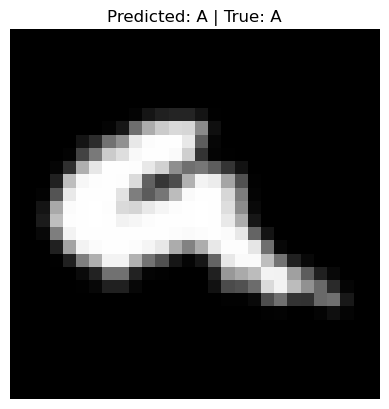

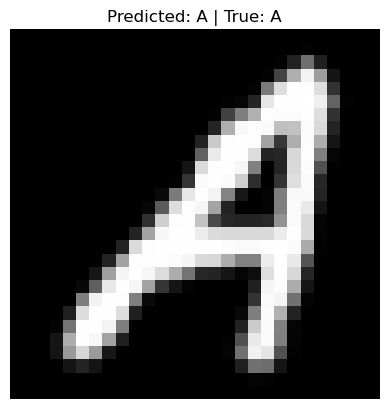

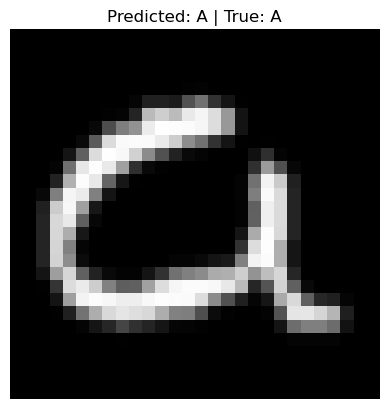

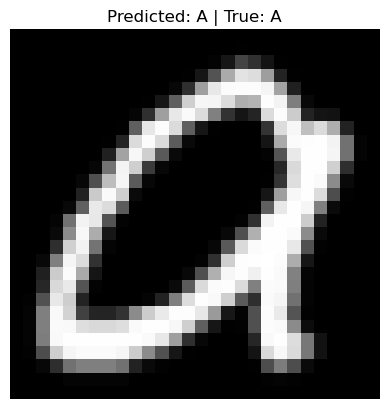

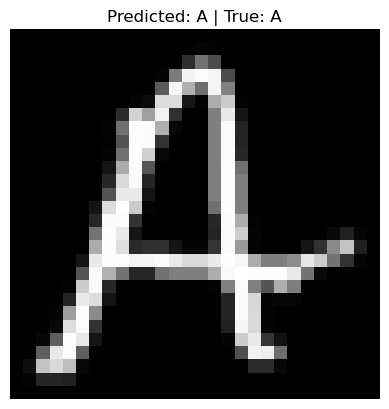

In [8]:
import matplotlib.pyplot as plt

class_names = [chr(i) for i in range(65, 91)]

predictions = model.predict(test_images[:5])

for i in range(5):
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]} | True: {class_names[test_labels[i]]}")
    plt.axis('off')
    plt.show()